<a href="https://colab.research.google.com/github/Aditya04-s/Algorithms-and-Problem-Solving-Lab/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Sample Input: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sample Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
Sample test passed.

Measuring execution times for Counting Sort...
  Input Size: 100, Time: 0.000064 seconds
  Input Size: 500, Time: 0.000184 seconds
  Input Size: 1000, Time: 0.000186 seconds
  Input Size: 2000, Time: 0.000306 seconds
  Input Size: 5000, Time: 0.000713 seconds
  Input Size: 10000, Time: 0.001686 seconds
  Input Size: 20000, Time: 0.002662 seconds


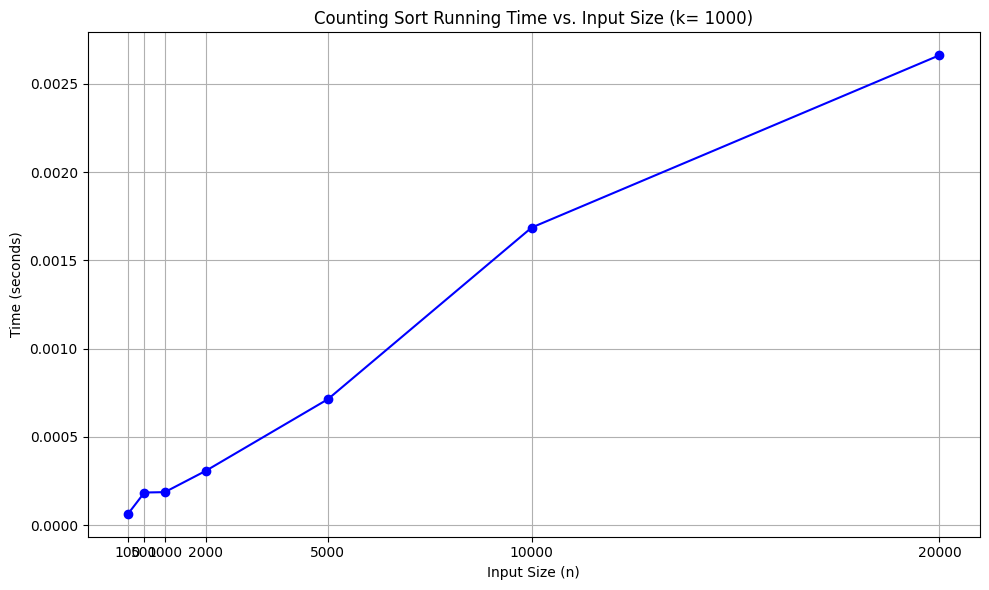

In [13]:
import time
import matplotlib.pyplot as plt
import random

def counting_sort(arr):
    if not arr:
        return []

    max_val = max(arr)

    counts = [0] * (max_val + 1)

    for num in arr:
        counts[num] += 1

    sorted_arr = []
    for i in range(len(counts)):
        while counts[i] > 0:
            sorted_arr.append(i)
            counts[i] -= 1

    return sorted_arr

sample_input = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
sample_output = counting_sort(sample_input)
print(f"Sample Input: {sample_input}")
print(f"Sample Output: {sample_output}")
assert sample_output == [1, 2, 2, 3, 3, 3, 4, 4, 4, 4], "Sample test failed!"
print("Sample test passed.\n")

def measure_time(sort_func, arr):
    start_time = time.perf_counter()
    sort_func(arr)
    end_time = time.perf_counter()
    return end_time - start_time

input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
times = []

max_val_for_tests = 1000

print("Measuring execution times for Counting Sort...")
for size in input_sizes:
    data = [random.randint(0, max_val_for_tests) for _ in range(size)]
    time_taken = measure_time(counting_sort, data)
    times.append(time_taken)
    print(f"  Input Size: {size}, Time: {time_taken:.6f} seconds")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times, marker='o', linestyle='-', color='b')
plt.title('Counting Sort Running Time vs. Input Size (k= {})'.format(max_val_for_tests))
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(input_sizes)
plt.tight_layout()
plt.show()

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Sample Input (Bucket Sort): [8, 5, 3, 1, 9, 6, 0, 7, 4, 2]
Sample Output (Bucket Sort): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Bucket Sort Sample test passed.

Measuring execution times for Bucket Sort...
  Input Size: 100, Time: 0.000055 seconds
  Input Size: 500, Time: 0.000219 seconds
  Input Size: 1000, Time: 0.000454 seconds
  Input Size: 2000, Time: 0.000973 seconds
  Input Size: 5000, Time: 0.002424 seconds
  Input Size: 10000, Time: 0.006357 seconds
  Input Size: 20000, Time: 0.013436 seconds


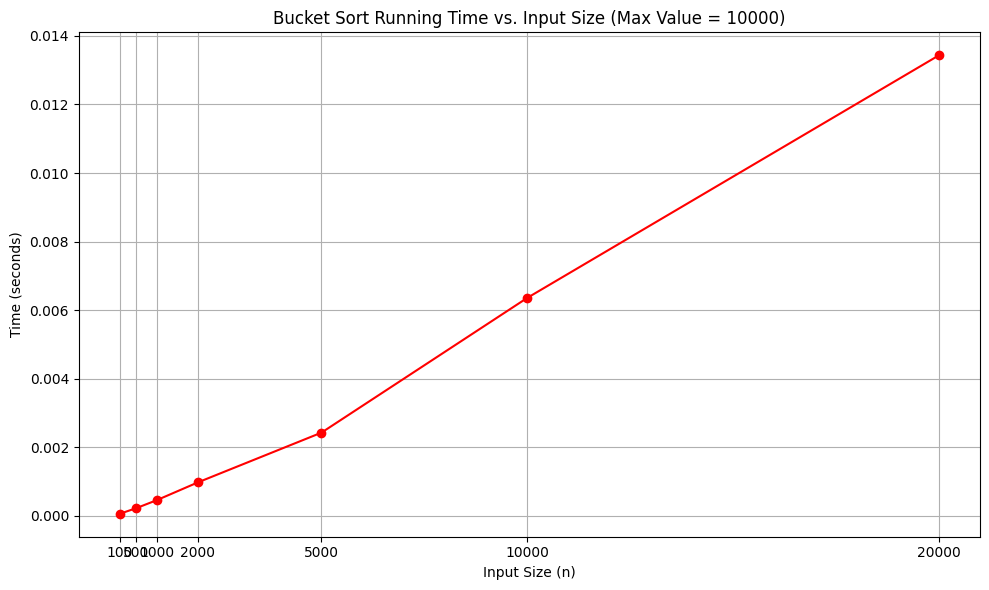

In [14]:
import time
import matplotlib.pyplot as plt
import random

def bucket_sort(arr):
    if not arr:
        return []

    max_val = max(arr)
    min_val = min(arr)

    if max_val == min_val:
        return arr

    num_buckets = 10
    buckets = [[] for _ in range(num_buckets)]

    range_val = (max_val - min_val + 1) / num_buckets

    for num in arr:
        if range_val == 0:
            bucket_index = 0
        else:
            bucket_index = min(int((num - min_val) / range_val), num_buckets - 1)
        buckets[bucket_index].append(num)

    sorted_arr = []
    for bucket in buckets:
        bucket.sort()
        sorted_arr.extend(bucket)

    return sorted_arr

sample_input_bucket = [8, 5, 3, 1, 9, 6, 0, 7, 4, 2]
expected_output_bucket = sorted(sample_input_bucket)
sample_output_bucket = bucket_sort(sample_input_bucket)

print(f"Sample Input (Bucket Sort): {sample_input_bucket}")
print(f"Sample Output (Bucket Sort): {sample_output_bucket}")
assert sample_output_bucket == expected_output_bucket, "Bucket Sort Sample test failed!"
print("Bucket Sort Sample test passed.\n")

def measure_time(sort_func, arr):
    start_time = time.perf_counter()
    sort_func(arr)
    end_time = time.perf_counter()
    return end_time - start_time

input_sizes_bucket = [100, 500, 1000, 2000, 5000, 10000, 20000]
times_bucket = []


max_val_for_tests_bucket = 10000

print("Measuring execution times for Bucket Sort...")
for size in input_sizes_bucket:
    data_bucket = [random.randint(0, max_val_for_tests_bucket) for _ in range(size)]
    time_taken_bucket = measure_time(bucket_sort, data_bucket)
    times_bucket.append(time_taken_bucket)
    print(f"  Input Size: {size}, Time: {time_taken_bucket:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(input_sizes_bucket, times_bucket, marker='o', linestyle='-', color='r')
plt.title('Bucket Sort Running Time vs. Input Size (Max Value = {})'.format(max_val_for_tests_bucket))
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(input_sizes_bucket)
plt.tight_layout()
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Sample Input (Radix Sort): [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sample Output (Radix Sort): [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]
Radix Sort Sample test passed.

Measuring execution times for Radix Sort...
  Input Size: 100, Time: 0.000193 seconds
  Input Size: 500, Time: 0.000881 seconds
  Input Size: 1000, Time: 0.001663 seconds
  Input Size: 2000, Time: 0.003518 seconds
  Input Size: 5000, Time: 0.009187 seconds
  Input Size: 10000, Time: 0.024693 seconds
  Input Size: 20000, Time: 0.042545 seconds


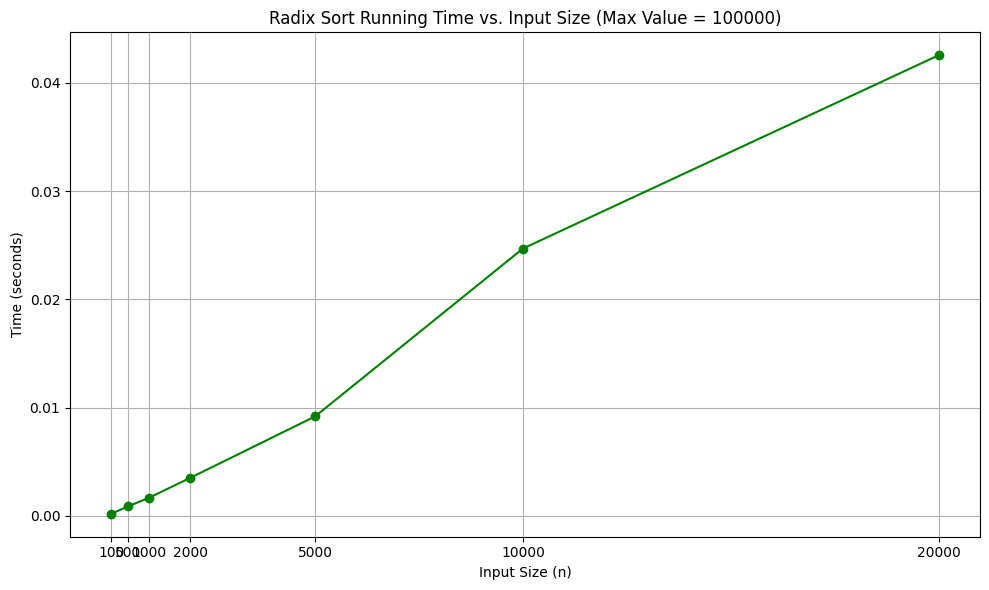

In [15]:
import time
import matplotlib.pyplot as plt
import random

def countingSort_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    if not arr:
        return []

    max1 = max(arr)

    exp = 1
    while max1 // exp > 0:
        countingSort_radix(arr, exp)
        exp *= 10
    return arr

sample_input_radix = [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
sample_input_radix_copy = list(sample_input_radix)
expected_output_radix = sorted(sample_input_radix)
sample_output_radix = radix_sort(sample_input_radix_copy)

print(f"Sample Input (Radix Sort): {sample_input_radix}")
print(f"Sample Output (Radix Sort): {sample_output_radix}")
assert sample_output_radix == expected_output_radix, "Radix Sort Sample test failed!"
print("Radix Sort Sample test passed.\n")

def measure_time(sort_func, arr):
    start_time = time.perf_counter()
    sort_func(arr)
    end_time = time.perf_counter()
    return end_time - start_time

input_sizes_radix = [100, 500, 1000, 2000, 5000, 10000, 20000]
times_radix = []

max_val_for_tests_radix = 100000
print("Measuring execution times for Radix Sort...")
for size in input_sizes_radix:
    data_radix = [random.randint(0, max_val_for_tests_radix) for _ in range(size)]
    time_taken_radix = measure_time(radix_sort, list(data_radix))
    times_radix.append(time_taken_radix)
    print(f"  Input Size: {size}, Time: {time_taken_radix:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(input_sizes_radix, times_radix, marker='o', linestyle='-', color='g')
plt.title('Radix Sort Running Time vs. Input Size (Max Value = {})'.format(max_val_for_tests_radix))
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(input_sizes_radix)
plt.tight_layout()
plt.show()